Sierpiński Triangle Concept: 
The Sierpiński triangle is a fractal that is constructed by recursively subdividing an equilateral triangle into smaller triangles. 

Starting with an equilateral triangle.
Subdividing the triangle into four smaller congruent equilateral triangles and removing the central triangle.
Repeating the process for each of the remaining smaller triangles.

Recursive Function:
Creates a recursive function that:
Draws the initial triangle.
Calculates the midpoints of the triangle's sides.
Calls itself to draw three smaller triangles, excluding the middle triangle.
Visualisation:
Using Matplotlib to plot the triangles at each recursive step.

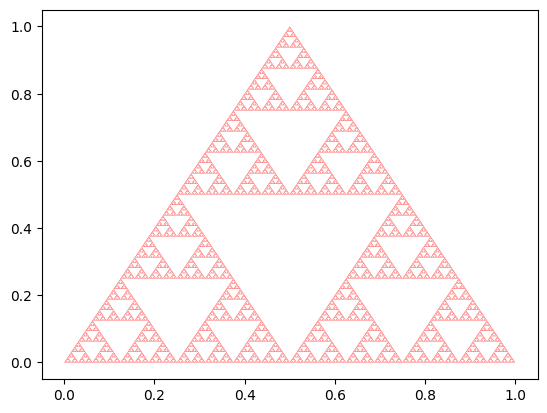

In [4]:
import matplotlib.pyplot as plt

def sierpinski_triangle(vertices, depth): 
    if depth == 0:  # Base case: if the recursion depth is 0, draw the triangle.
        plt.fill(*zip(*vertices), 'r') # Unpack and zip the vertices to fill the triangle 
    else: # Recursive case: subdivide the triangle into smaller triangles
        midpoints = [ # Calculate midpoints of each side of the triangle.
            [(vertices[i][0] + vertices[(i+1) % 3][0]) / 2, # x-coordinate of midpoint
             (vertices[i][1] + vertices[(i+1) % 3][1]) / 2] # y-coordinate of midpoint
            for i in range(3) # Loop over each vertex
        ]
        # Recursively draw the three smaller triangles
        sierpinski_triangle([vertices[0], midpoints[0], midpoints[2]], depth - 1)
        sierpinski_triangle([vertices[1], midpoints[1], midpoints[0]], depth - 1)
        sierpinski_triangle([vertices[2], midpoints[2], midpoints[1]], depth - 1)

# Initial vertices of the triangle 
vertices = [(0, 0), (1, 0), (0.5, 1)]
depth = 9 # Set the recursion depth

plt.figure() # Create a new figure for plotting
sierpinski_triangle(vertices, depth) # Call the sierpinski_triangle with initial vertices and depth
plt.show()


Mandelbrot Set (Multibrot)
Approach:

Use complex numbers to generate the Mandelbrot set.
Iterate the function z = z^2 + c for each point in the complex plane.
Color the points based on the number of iterations before the magnitude exceeds a threshold.
Steps:

Complex Plane Setup:
Define the range of values for the real and imaginary parts of c.

Iteration Function:
Create a function to iterate z = z^2 + c and count the number of iterations before |z| > 2.

Plotting:
Use Matplotlib to plot the points, coloring them based on the iteration count.

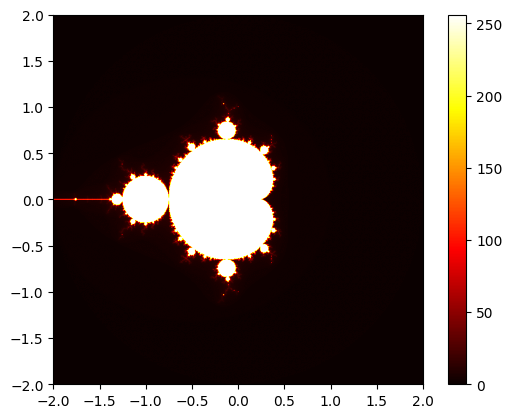

In [12]:
import numpy as np  
import matplotlib.pyplot as plt 

# Define a function to check if a point is in the Mandelbrot set
def mandelbrot(c, max_iter):
    z = c  # Start with z as the same number as c
    for n in range(max_iter):  # Repeat this up to max_iter times
        if abs(z) > 2:  # If z gets too big (greater than 2)
            return n  # Stop and tell us how many times we repeated
        z = z*z + c  # Otherwise, update z using this formula
    return max_iter  # If we never stopped early, return max_iter

# Image size (pixels)
width, height = 800, 800  # Set the size of the picture

# Plot window
re_min, re_max = -2, 2  # Decide where to look on the real part (horizontal)
im_min, im_max = -2, 2  # Decide where to look on the imaginary part (vertical)

# Max iterations
max_iter = 256  # Set the max number of times we repeat our steps

# Generate the Mandelbrot set
image = np.zeros((height, width))  # Create an empty picture
for x in range(width):  # Go through each column of pixels
    for y in range(height):  # Go through each row of pixels
        # Find the complex number for each pixel's position
        c = complex(re_min + (x / width) * (re_max - re_min),
                    im_min + (y / height) * (im_max - im_min))
        image[y, x] = mandelbrot(c, max_iter)  # Check each point and store the result

# Display the picture
plt.imshow(image, cmap='hot', extent=[re_min, re_max, im_min, im_max])  # Show the picture with colors
plt.colorbar()  # Add a color bar to explain the colors
plt.show()  # Display the picture


Julia Set
Approach:

Similar to the Mandelbrot set but with a fixed complex number c.
Iterate the function z = z^2 + c for each point in the complex plane.
Steps:

Complex Plane Setup:
Define the range of values for the real and imaginary parts of z.

Iteration Function:
Create a function to iterate z = z^2 + c with a fixed c and count the number of iterations before |z| > 2.

Plotting:
Use Matplotlib to plot the points, coloring them based on the iteration count.

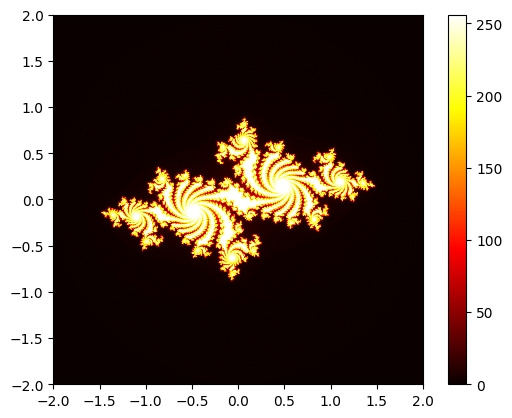

In [20]:
import numpy as np 
import matplotlib.pyplot as plt  

# Define a function to check if a point is in the Julia set
def julia(z, c, max_iter):
    for n in range(max_iter):  # Repeat this up to max_iter times
        if abs(z) > 2:  # If z gets too big (greater than 2)
            return n  # Stop and tell us how many times we repeated
        z = z*z + c  # Otherwise, update z using this formula
    return max_iter  # If we never stopped early, return max_iter

# Fixed parameter for Julia set
c = complex(-0.7, 0.27115)  # Use a fixed complex number to define the Julia set

# Image size (pixels)
width, height = 1000, 1000  # Set the size of the picture

# Plot window
re_min, re_max = -2, 2  # Decide where to look on the real part (horizontal)
im_min, im_max = -2, 2  # Decide where to look on the imaginary part (vertical)

# Max iterations
max_iter = 256  # Set the max number of times we repeat our steps

# Generate the Julia set
image = np.zeros((height, width))  # Create an empty picture
for x in range(width):  # Go through each column of pixels
    for y in range(height):  # Go through each row of pixels
        # Find the complex number for each pixel's position
        z = complex(re_min + (x / width) * (re_max - re_min),
                    im_min + (y / height) * (im_max - im_min))
        image[y, x] = julia(z, c, max_iter)  # Check each point and store the result

# Display the picture
plt.imshow(image, cmap='hot', extent=[re_min, re_max, im_min, im_max])  # Show the picture with colors
plt.colorbar()  # Add a color bar to explain the colors
plt.show()  # Display the picture


Koch Snowflake

Approach:
Use an iterative method to generate the Koch snowflake.
Start with an equilateral triangle and iteratively replace each line segment with a bent line segment.

Steps:
Initial Triangle:
Create a function to draw an equilateral triangle.

Iterative Function:
Create a function to replace each line segment with four new segments to form a "bump".

Visualisation:
Use Matplotlib to plot the snowflake at each iteration.

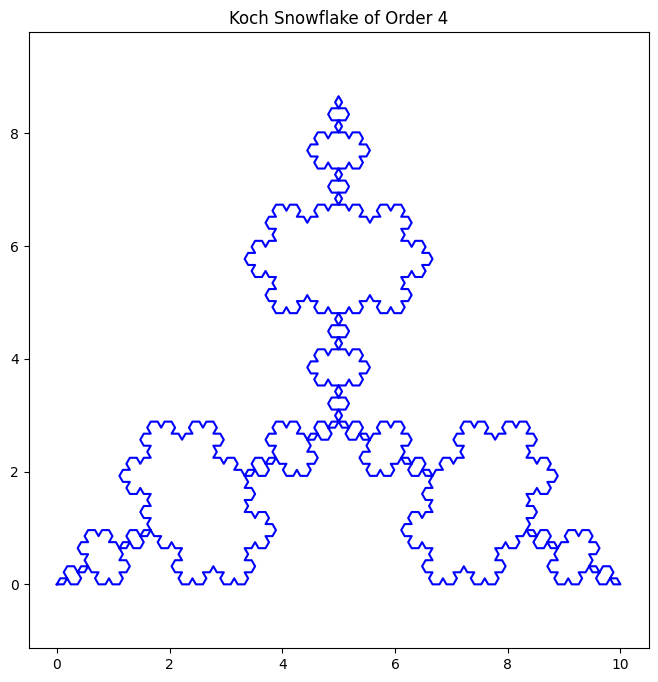

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, scale=10):
    def koch_curve(points, order):
        if order == 0:
            return points
        new_points = []
        for i in range(len(points) - 1):
            p1, p2 = points[i], points[i + 1]
            s = np.subtract(p2, p1) / 3
            p3 = np.add(p1, s)
            p5 = np.subtract(p2, s)
            p4 = p3 + np.array([np.cos(np.pi / 3) * s[0] - np.sin(np.pi / 3) * s[1],
                                np.sin(np.pi / 3) * s[0] + np.cos(np.pi / 3) * s[1]])
            new_points.extend([p1, p3, p4, p5])
        new_points.append(points[-1])
        return koch_curve(new_points, order - 1)
    
    # Initial equilateral triangle
    p1 = np.array([0, 0])
    p2 = np.array([scale, 0])
    p3 = np.array([scale / 2, scale * np.sin(np.pi / 3)])
    points = np.array([p1, p2, p3, p1])
    
    # Generate Koch snowflake points
    points = koch_curve(points, order)
    points = np.array(points)  # Convert to NumPy array
    
    # Plotting the Koch snowflake
    plt.figure(figsize=(8, 8))
    plt.plot(points[:, 0], points[:, 1], 'b-')
    plt.axis('equal')
    plt.title(f'Koch Snowflake of Order {order}')
    plt.show()

# Draw Koch snowflake of order 4
koch_snowflake(order=4)

Burning Ship
Approach:

Similar to the Mandelbrot set but with a modified iteration formula.
Iterate the function z = (|Re(z)| + i|Im(z)|)^2 + c for each point in the complex plane.
Steps:

Complex Plane Setup:

Define the range of values for the real and imaginary parts of c.
Iteration Function:

Create a function to iterate z = (|Re(z)| + i|Im(z)|)^2 + c and count the number of iterations before |z| > 2.
Plotting:

Use Matplotlib to plot the points, coloring them based on the iteration count.

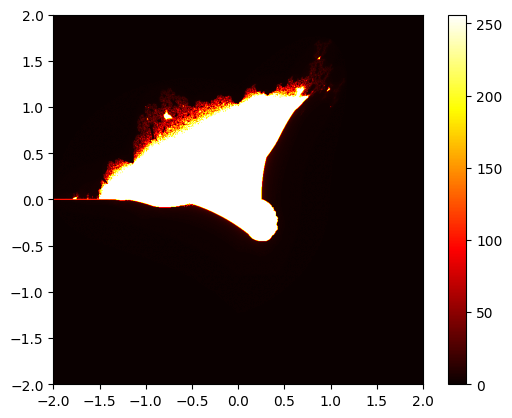

In [9]:
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define the burning_ship function to check if a point is in the Burning Ship set
def burning_ship(c, max_iter):
    z = c  # Initialize z to the complex number c
    for n in range(max_iter):  # Iterate up to max_iter times
        z = complex(abs(z.real), abs(z.imag))**2 + c  # Update z according to the Burning Ship iteration formula
        if abs(z) > 2:  # If the magnitude of z exceeds 2
            return n  # Return the current iteration count
    return max_iter  # If z never exceeded 2, return max_iter

# Image size (pixels)
width, height = 800, 800  # Set the dimensions of the image

# Plot window
re_min, re_max = -2, 2  # Define the range for the real part of the complex plane
im_min, im_max = -2, 2  # Define the range for the imaginary part of the complex plane

# Max iterations
max_iter = 256  # Set the maximum number of iterations

# Generate the Burning Ship fractal
image = np.zeros((height, width))  # Create a 2D array to store the results
for x in range(width):  # Loop over each pixel column
    for y in range(height):  # Loop over each pixel row
        # Map the pixel to a point in the complex plane
        c = complex(re_min + (x / width) * (re_max - re_min),
                    im_min + (y / height) * (im_max - im_min))
        image[y, x] = burning_ship(c, max_iter)  # Store the result of the Burning Ship function

# Plot the image
plt.imshow(image, cmap='hot', extent=[re_min, re_max, im_min, im_max])  # Display the image with a colormap
plt.colorbar()  # Add a colorbar to show the iteration counts
plt.show()  # Display the plot
